In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../practice/practice_datasets/fish_specices.csv")
df.sample(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
132,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
48,Roach,169.0,22.0,24.0,27.2,7.5344,3.8352
63,Parkki,90.0,16.3,17.7,19.8,7.4052,2.6730


## Data Exploration

In [22]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [34]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

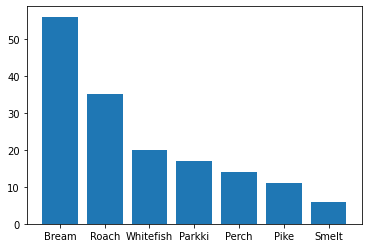

In [56]:
plt.bar(df["Species"].unique(), df["Species"].value_counts())
plt.show()